In [1]:
import numpy as np
import pandas as pd

In [86]:
""" 讀檔
    groupby day
"""
data = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv',
                   parse_dates=[['year', 'month', 'day']])

data = data.drop(['No','hour'], axis=1)
data = data.groupby(['year_month_day'])['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
                                        'Iws', 'Is', 'Ir'].mean().fillna(0)
print('shape:{}'.format(data.shape))

shape:(1826, 7)


In [6]:
data_Y = data.loc[:,'pm2.5']
data_X = data.drop(['pm2.5'], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
""" 正規化
"""
scaler = StandardScaler()
data_X = scaler.fit_transform(data_X)

In [16]:
""" 分train & test
"""
train_X = data_X[:-30]
train_Y = data_Y[:-30]
test_X = data_X[-30:]
test_Y = data_Y[-30:]

In [17]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1796, 6)
(1796,)
(30, 6)
(30,)


In [18]:
""" reshape, 加timesteps
"""
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1,test_X.shape[1]))

In [78]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras import callbacks, optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from math import sqrt

In [20]:
size = train_X.shape[0]
timesteps = train_X.shape[1]
data_dim = train_X.shape[2]

In [46]:
model = Sequential()
lstm_kwargs = {'return_sequences': True}
model.add(LSTM(128, input_shape=(timesteps, data_dim), **lstm_kwargs))
lstm_kwargs = {'return_sequences': False}
model.add(LSTM(64, **lstm_kwargs))

model.add(Dense(1))


In [54]:
opt = optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 1, 128)            69120     
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________


In [56]:
y_mean = train_Y.mean()
model.fit(train_X, train_Y-y_mean, batch_size=8, epochs=300, verbose=2)

Epoch 1/300
 - 1s - loss: 1773.5625 - mean_squared_error: 1773.5625
Epoch 2/300
 - 1s - loss: 1756.9162 - mean_squared_error: 1756.9162
Epoch 3/300
 - 1s - loss: 1732.3685 - mean_squared_error: 1732.3685
Epoch 4/300
 - 1s - loss: 1727.0135 - mean_squared_error: 1727.0135
Epoch 5/300
 - 1s - loss: 1707.2630 - mean_squared_error: 1707.2630
Epoch 6/300
 - 1s - loss: 1703.6289 - mean_squared_error: 1703.6289
Epoch 7/300
 - 1s - loss: 1696.4844 - mean_squared_error: 1696.4844
Epoch 8/300
 - 1s - loss: 1714.2619 - mean_squared_error: 1714.2619
Epoch 9/300
 - 1s - loss: 1708.8195 - mean_squared_error: 1708.8195
Epoch 10/300
 - 1s - loss: 1693.1641 - mean_squared_error: 1693.1641
Epoch 11/300
 - 1s - loss: 1691.3754 - mean_squared_error: 1691.3754
Epoch 12/300
 - 1s - loss: 1693.4935 - mean_squared_error: 1693.4935
Epoch 13/300
 - 1s - loss: 1734.7450 - mean_squared_error: 1734.7450
Epoch 14/300
 - 1s - loss: 1741.7580 - mean_squared_error: 1741.7580
Epoch 15/300
 - 1s - loss: 1752.7332 - mean

Epoch 120/300
 - 1s - loss: 1604.4578 - mean_squared_error: 1604.4578
Epoch 121/300
 - 1s - loss: 1602.9683 - mean_squared_error: 1602.9683
Epoch 122/300
 - 1s - loss: 1598.1427 - mean_squared_error: 1598.1427
Epoch 123/300
 - 1s - loss: 1606.2528 - mean_squared_error: 1606.2528
Epoch 124/300
 - 1s - loss: 1629.6575 - mean_squared_error: 1629.6575
Epoch 125/300
 - 1s - loss: 1614.1645 - mean_squared_error: 1614.1645
Epoch 126/300
 - 1s - loss: 1617.5056 - mean_squared_error: 1617.5056
Epoch 127/300
 - 1s - loss: 1601.9367 - mean_squared_error: 1601.9367
Epoch 128/300
 - 1s - loss: 1593.5418 - mean_squared_error: 1593.5418
Epoch 129/300
 - 1s - loss: 1613.1093 - mean_squared_error: 1613.1093
Epoch 130/300
 - 1s - loss: 1603.1319 - mean_squared_error: 1603.1319
Epoch 131/300
 - 1s - loss: 1589.1134 - mean_squared_error: 1589.1134
Epoch 132/300
 - 1s - loss: 1666.3623 - mean_squared_error: 1666.3623
Epoch 133/300
 - 1s - loss: 1644.2138 - mean_squared_error: 1644.2138
Epoch 134/300
 - 1s 

 - 1s - loss: 1483.6468 - mean_squared_error: 1483.6468
Epoch 238/300
 - 1s - loss: 1482.8755 - mean_squared_error: 1482.8755
Epoch 239/300
 - 1s - loss: 1489.6419 - mean_squared_error: 1489.6419
Epoch 240/300
 - 1s - loss: 1474.3871 - mean_squared_error: 1474.3871
Epoch 241/300
 - 1s - loss: 1467.1103 - mean_squared_error: 1467.1103
Epoch 242/300
 - 1s - loss: 1480.6516 - mean_squared_error: 1480.6516
Epoch 243/300
 - 1s - loss: 1493.5924 - mean_squared_error: 1493.5924
Epoch 244/300
 - 1s - loss: 1497.6183 - mean_squared_error: 1497.6183
Epoch 245/300
 - 1s - loss: 1491.5658 - mean_squared_error: 1491.5658
Epoch 246/300
 - 1s - loss: 1493.6100 - mean_squared_error: 1493.6100
Epoch 247/300
 - 1s - loss: 1473.1147 - mean_squared_error: 1473.1147
Epoch 248/300
 - 1s - loss: 1469.6995 - mean_squared_error: 1469.6995
Epoch 249/300
 - 1s - loss: 1488.6083 - mean_squared_error: 1488.6083
Epoch 250/300
 - 1s - loss: 1502.7728 - mean_squared_error: 1502.7728
Epoch 251/300
 - 1s - loss: 1517.2

In [81]:
pred = (model.predict(test_X) + y_mean)
print('RMSE: {}'.format(sqrt(mean_squared_error(test_Y, pred))))

RMSE: 52.6998849629021


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

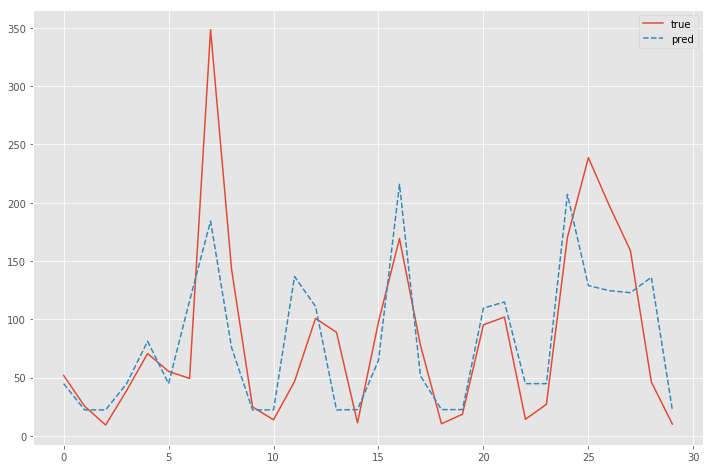

In [88]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax1.plot(test_Y.values, label='true', linestyle='-')
ax1.plot(pred,label='pred', linestyle='--')
ax1.legend(loc='best');
plt.show()